In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [4]:
df = pd.read_csv('CO2 Emissions_Canada.csv')

# take a look at the dataset
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [8]:
cdf = df[['Engine Size(L)','Cylinders','Fuel Consumption Comb (mpg)','CO2 Emissions(g/km)']]
cdf.head(9)

,Engine Size(L),Cylinders,Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,2.0,4,33,196
1,2.4,4,29,221
2,1.5,4,48,136
3,3.5,6,25,255
4,3.5,6,27,244
5,3.5,6,28,230
6,3.5,6,28,232
7,3.7,6,25,255
8,3.7,6,24,267


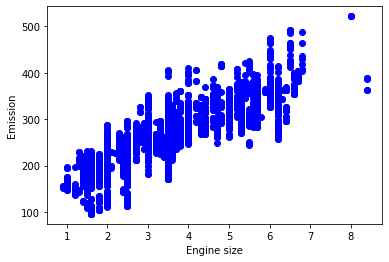

In [10]:
plt.scatter(cdf["Engine Size(L)"], cdf["CO2 Emissions(g/km)"],  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [12]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['Engine Size(L)']])
train_y = np.asanyarray(train[['CO2 Emissions(g/km)']])

test_x = np.asanyarray(test[['Engine Size(L)']])
test_y = np.asanyarray(test[['CO2 Emissions(g/km)']])


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[1.  , 2.  , 4.  ],
       [1.  , 2.4 , 5.76],
       [1.  , 1.5 , 2.25],
       ...,
       [1.  , 2.  , 4.  ],
       [1.  , 2.  , 4.  ],
       [1.  , 2.  , 4.  ]])

In [15]:
regr = linear_model.LinearRegression()
train_y_ = regr.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[ 0.         53.28210484 -2.17622817]]
Intercept:  [107.96833265]


Text(0, 0.5, 'Emission')

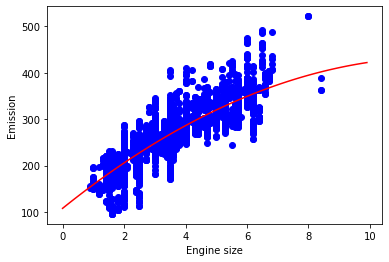

In [17]:
plt.scatter(train[['Engine Size(L)']], train[['CO2 Emissions(g/km)']],  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = regr.intercept_[0]+ regr.coef_[0][1]*XX+ regr.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, 'red' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [18]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = regr.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 23.31
Residual sum of squares (MSE): 916.41
R2-score: 0.65


In [20]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = regr.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 23.31
Residual sum of squares (MSE): 916.41
R2-score: 0.65


Mean absolute error: 23.18
Residual sum of squares (MSE): 913.28
R2-score: 0.65


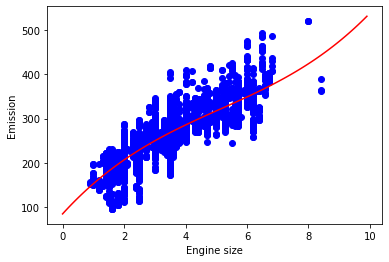

In [22]:
poly3 = PolynomialFeatures(degree=3)
train_x_poly3 = poly3.fit_transform(train_x)

regr3 = linear_model.LinearRegression()
regr3.fit(train_x_poly3, train_y)

plt.scatter(train[['Engine Size(L)']], train[['CO2 Emissions(g/km)']],  color='blue')
yy = regr3.intercept_[0]+ regr3.coef_[0][1]*XX+ regr3.coef_[0][2]*np.power(XX, 2)+ regr3.coef_[0][3]*np.power(XX, 3)
plt.plot(XX, yy, 'red' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

test_x_poly = poly3.fit_transform(test_x)
test_y_ = regr3.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )